In [1]:
#ROI analysis with difference using permutation + null dist (not t-test)

In [1]:
# Functional imports
import os 
import numpy as np
import nibabel as nib

from data_prep_helpers import make_vol
from plotting_helpers import darken_color, plot_lateral_only, plot_lateral_only_with_vmax, plot_surfaces, plot_surfaces_with_vmax
import data_prep_helpers_new as helpers_new
# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 5

/home/imelizabeth/.conda/envs/cloudy2/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


Autosaving every 5 seconds


In [2]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'data-lisik3', 'imelizabeth', 'partly_cloudy-main', 'data')
print('Data location:', directory)

# Load masks
mask = nib.load(os.path.join(directory, 'adult_isc_mask.nii.gz'))
print('ISC Mask:', np.shape(mask))

group_mask = nib.load(os.path.join(directory, 'group_mask.nii.gz'))
print('Anatomical mask:', np.shape(group_mask))

# Load mask
MT_mask_resampled_bool = nib.load(os.path.join(directory, 'adult_MT_mask.nii.gz'))
print('MT Mask shape:', np.shape(MT_mask_resampled_bool))

# Load mask
STS_mask_resampled = nib.load(os.path.join(directory, 'adult_STS_mask.nii.gz'))
print('STS Mask shape:', np.shape(STS_mask_resampled))

# # Plot mask
# plot_surfaces(vol= MT_mask_resampled_bool, title='Adult MT mask', vis_threshold=0.1)
# # Plot mask
# plot_surfaces(vol= mask, title='Adult ISC mask', vis_threshold=0.1)

Data location: /home/imelizabeth/data-lisik3/imelizabeth/partly_cloudy-main/data
ISC Mask: (79, 95, 68)
Anatomical mask: (79, 95, 68)
MT Mask shape: (79, 95, 68)
STS Mask shape: (79, 95, 68)


In [3]:
def rand_sign_flip_ROI(value):
    """
     Randomly flips signs for some ist of scalar values
    """
    return value * np.random.choice([-1,1])

def generate_null_ROI(data, n_permutations):
    """
    Generates a null distribution via a 1-sampled sign-flip permutation test.
    Returns a null distribution of size n_permutations.
    """
    
    null_dist = []

    for _ in range(n_permutations):
        # Randomly flip signs for each subject's data
        flipped_data = [rand_sign_flip_ROI(subject) for subject in data]
        
        # Calculate mean from sign flipped subject data
        flipped_mean = np.mean(flipped_data)
        
        # Store in null_dist
        null_dist.append(flipped_mean)

    return null_dist

In [4]:
#Load social model scores data

social_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded_whole', '3-4-yrs_social_only_scores_adult_isc_mask.npy')), axis=0)

social_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_social_only_scores_adult_isc_mask.npy')), axis=0)

social_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs','encoding_results', 'unthresholded', '7-yrs_social_only_scores_adult_isc_mask.npy')), axis=0)

social_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_social_only_scores_adult_isc_mask.npy')), axis=0)

social_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_social_only_scores_adult_isc_mask.npy')), axis=0)

<h1> MT

0.12213249404078474
0.1168702604042919
0.10903025624365918
0.1168702604042919
0.1563599935508948


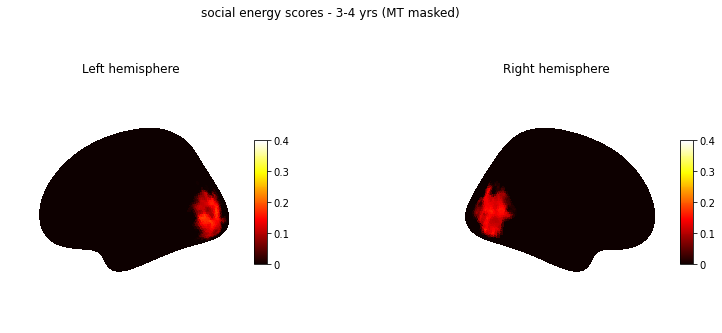

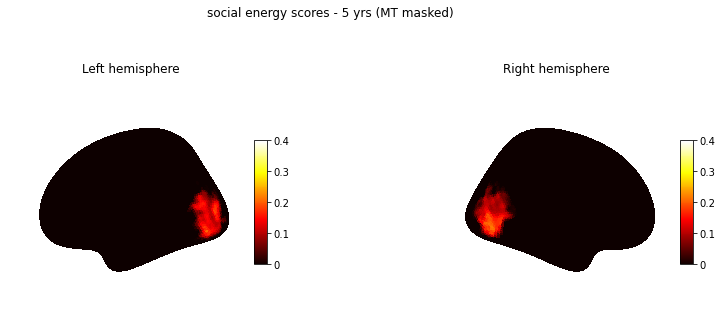

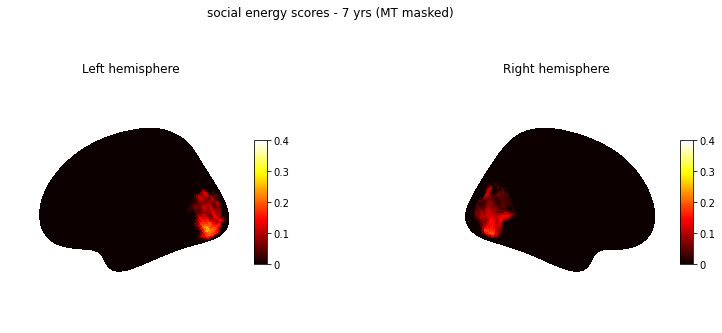

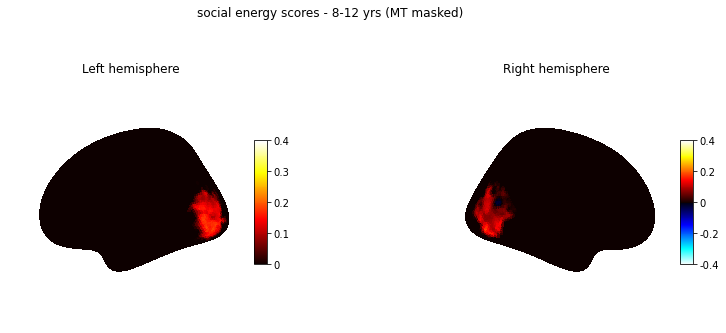

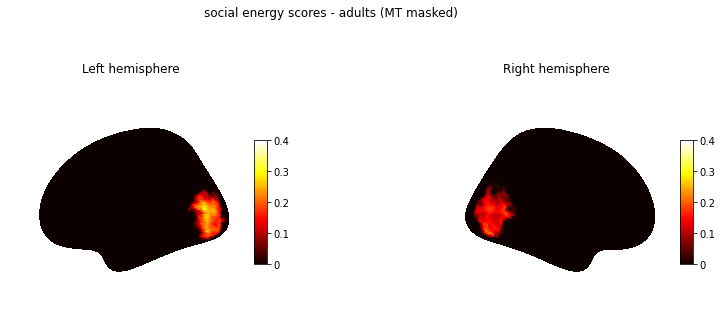

In [5]:

# mask 3-4 yrs data - MT

social_isc_volume_34yrs = make_vol(social_scores_34yrs_unthresholded, mask)
social_isc_volume_34yrs_array = social_isc_volume_34yrs.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_mt_volume_34yrs = social_isc_volume_34yrs_array.copy()
social_mt_volume_34yrs[mt_mask_array] = 0
social_mt_volume_34yrs_image = nib.Nifti1Image(social_mt_volume_34yrs, affine=social_isc_volume_34yrs.affine, header=social_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=social_mt_volume_34yrs_image, 
                            title='social energy scores - 3-4 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_34yrs_array[np.invert(mt_mask_array)].mean())



# mask 5 yrs data - MT

social_isc_volume_5yrs = make_vol(social_scores_5yrs_unthresholded, mask)
social_isc_volume_5yrs_array = social_isc_volume_5yrs.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_mt_volume_5yrs = social_isc_volume_5yrs_array.copy()
social_mt_volume_5yrs[mt_mask_array] = 0
social_mt_volume_5yrs_image = nib.Nifti1Image(social_mt_volume_5yrs, affine=social_isc_volume_5yrs.affine, header=social_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=social_mt_volume_5yrs_image, 
                            title='social energy scores - 5 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_5yrs_array[np.invert(mt_mask_array)].mean())


# mask 7 yrs data - MT

social_isc_volume_7yrs = make_vol(social_scores_7yrs_unthresholded, mask)
social_isc_volume_7yrs_array = social_isc_volume_7yrs.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_mt_volume_7yrs = social_isc_volume_7yrs_array.copy()
social_mt_volume_7yrs[mt_mask_array] = 0
social_mt_volume_7yrs_image = nib.Nifti1Image(social_mt_volume_7yrs, affine=social_isc_volume_7yrs.affine, header=social_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=social_mt_volume_7yrs_image, 
                            title='social energy scores - 7 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_7yrs_array[np.invert(mt_mask_array)].mean())


# mask 8-12 yrs data - MT

social_isc_volume_812yrs = make_vol(social_scores_812yrs_unthresholded, mask)
social_isc_volume_812yrs_array = social_isc_volume_812yrs.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_mt_volume_812yrs = social_isc_volume_812yrs_array.copy()
social_mt_volume_812yrs[mt_mask_array] = 0
social_mt_volume_812yrs_image = nib.Nifti1Image(social_mt_volume_812yrs, affine=social_isc_volume_812yrs.affine, header=social_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=social_mt_volume_812yrs_image, 
                            title='social energy scores - 8-12 yrs (MT masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_5yrs_array[np.invert(mt_mask_array)].mean())



#mask adult data - MT

social_isc_volume_adult = make_vol(social_scores_adults_unthresholded, mask)
social_isc_volume_adult_array = social_isc_volume_adult.get_fdata()
mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_mt_volume_adult = social_isc_volume_adult_array.copy()
social_mt_volume_adult[mt_mask_array] = 0
social_mt_volume_adult_image = nib.Nifti1Image(social_mt_volume_adult, affine=social_isc_volume_adult.affine, header=social_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=social_mt_volume_adult_image, 
                            title='social energy scores - adults (MT masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_adult_array[np.invert(mt_mask_array)].mean())

In [6]:
#load individual subject score

subj_social_scores_34yrs_unthresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_34yrs_unthresholded.shape)
n_34yrs = subj_social_scores_34yrs_unthresholded.shape[-1]

subj_social_scores_5yrs_unthresholded = np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_5yrs_unthresholded.shape)
n_5yrs = subj_social_scores_5yrs_unthresholded.shape[-1]


subj_social_scores_7yrs_unthresholded = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_7yrs_unthresholded.shape)
n_7yrs = subj_social_scores_7yrs_unthresholded.shape[-1]


subj_social_scores_812yrs_unthresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_812yrs_unthresholded.shape)
n_812yrs = subj_social_scores_812yrs_unthresholded.shape[-1]

subj_social_scores_adults_unthresholded = np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_adults_unthresholded.shape)
n_adults = subj_social_scores_adults_unthresholded.shape[-1]

(136543, 31)
(136543, 34)
(136543, 23)
(136543, 34)
(136543, 33)


In [7]:
### get the encoding performance correlation score

mt_mask_array = MT_mask_resampled_bool.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

(79, 95, 68)
510340
136543


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_null_difference_permute_groups(group1_scores, group2_scores, n_permutations):
    """
    Generates a null distribution of inter-group differences via group label permutation test.
    Returns a null distribution of dim n_permutations
    """
    all_scores = np.concatenate((group1_scores, group2_scores))
    null_dist = []

    for i in range(n_permutations):
        # Split data
        sample_group1, sample_group2 = train_test_split(all_scores, train_size=len(group1_scores), shuffle=True)

        # Calculate difference in means
        diff = np.mean(sample_group1) - np.mean(sample_group2)
        null_dist.append(diff)
    
    return null_dist


In [9]:
## get individual scores (MT averaged) 


In [10]:
### adults
print(subj_social_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_social_scores_adults_unthresholded # change subj data to shape of the brain
mt_adult_social_score = volume_adult[mt_mask_array, :].mean(axis=0)
print(mt_adult_social_score.shape) #an array of individual participants' score in MT
print(mt_adult_social_score.mean())

## Chance comparison
null_distribution = generate_null_ROI(mt_adult_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_adult_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 33)
(33,)
0.1563599935508948
(5000,)
Observed Mean: 0.1563599935508948
Chance Level from Null Distribution: -0.00021094741847841193
P-value: 0.0
The observed result is significantly different from chance


In [11]:
### 3-4-yrs
print(subj_social_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_social_scores_34yrs_unthresholded # change subj data to shape of the brain
mt_34yrs_social_score = volume_34yrs[mt_mask_array, :].mean(axis=0)
print(mt_34yrs_social_score.mean())


null_distribution = generate_null_difference_permute_groups(mt_adult_social_score, mt_34yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_social_score) - np.mean(mt_34yrs_social_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant")
    
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(mt_34yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_34yrs_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")
    



(136543, 31)
0.1221324940407847
(5000,)
0.0342274995101101
The difference between groups is not statistically significant
0.0504
(5000,)
Observed Mean: 0.1221324940407847
Chance Level from Null Distribution: -7.630359843130094e-05
P-value: 0.0
The observed result is significantly different from chance


In [12]:
### 5-yrs
print(subj_social_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_social_scores_5yrs_unthresholded # change subj data to shape of the brain
mt_5yrs_social_score = volume_5yrs[mt_mask_array, :].mean(axis=0)
print(mt_5yrs_social_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_social_score, mt_5yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_social_score) - np.mean(mt_5yrs_social_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant")
    
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(mt_5yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_5yrs_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 34)
0.11687026040429183
(5000,)
0.03948973314660298
The difference between groups is statistically significant!
0.0218
(5000,)
Observed Mean: 0.11687026040429183
Chance Level from Null Distribution: -3.3309433894633814e-05
P-value: 0.0
The observed result is significantly different from chance


In [13]:

### 7-yrs
print(subj_social_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_social_scores_7yrs_unthresholded # change subj data to shape of the brain
mt_7yrs_social_score = volume_7yrs[mt_mask_array, :].mean(axis=0)
print(mt_7yrs_social_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_social_score, mt_7yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_social_score) - np.mean(mt_7yrs_social_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant")
    
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(mt_7yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_7yrs_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 23)
0.10903025624365915
(5000,)
0.04732973730723565
The difference between groups is statistically significant!
0.0198
(5000,)
Observed Mean: 0.10903025624365915
Chance Level from Null Distribution: -0.00024398948870364842
P-value: 0.0
The observed result is significantly different from chance


In [14]:

### 8-12-yrs
print(subj_social_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_social_scores_812yrs_unthresholded # change subj data to shape of the brain
mt_812yrs_social_score = volume_812yrs[mt_mask_array, :].mean(axis=0)
print(mt_812yrs_social_score.mean())

null_distribution = generate_null_difference_permute_groups(mt_adult_social_score, mt_812yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(mt_adult_social_score) - np.mean(mt_812yrs_social_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant")
    
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(mt_812yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = mt_812yrs_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")


(136543, 34)
0.11511136902202732
(5000,)
0.04124862452886749
The difference between groups is statistically significant!
0.0168
(5000,)
Observed Mean: 0.11511136902202732
Chance Level from Null Distribution: -0.0003090569401549695
P-value: 0.0
The observed result is significantly different from chance


<h1> STS </h1>

0.09071732206577035
0.09711647538026942
0.10866860868354464
0.10952962765767893
0.11674295692252958


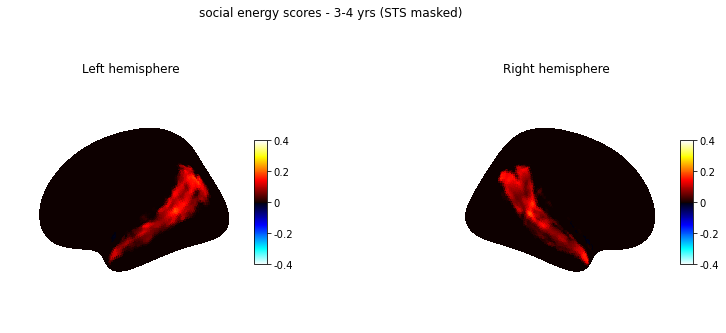

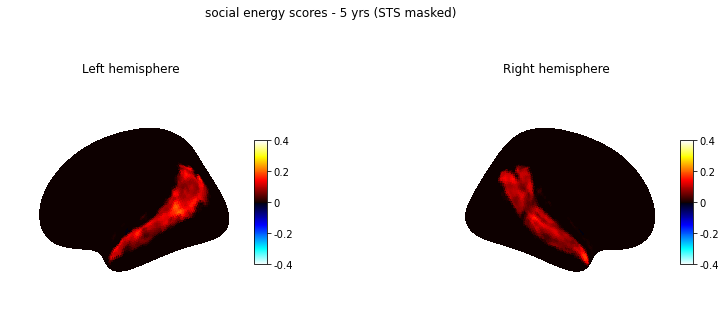

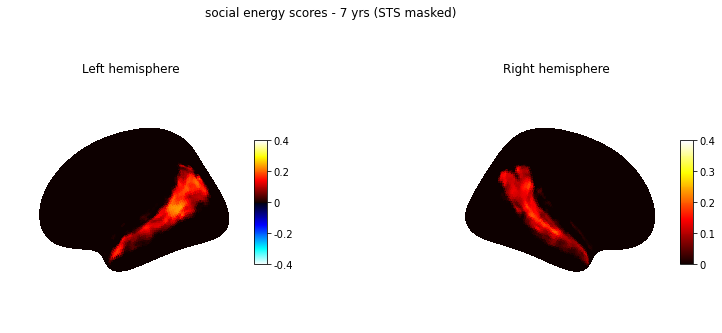

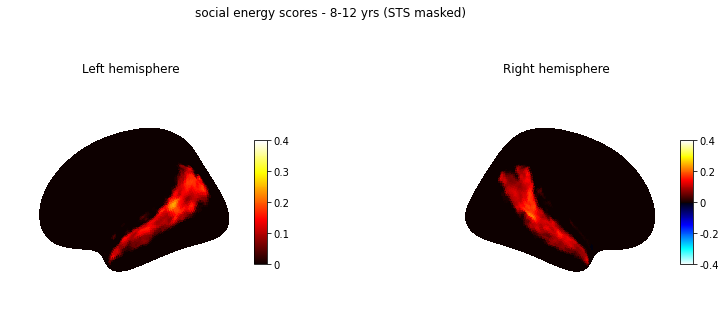

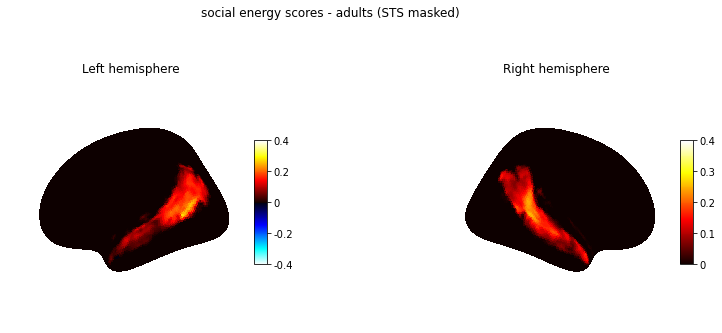

In [15]:
sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))



# mask 3-4 yrs data - STS

social_isc_volume_34yrs = make_vol(social_scores_34yrs_unthresholded, mask)
social_isc_volume_34yrs_array = social_isc_volume_34yrs.get_fdata()
#mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_sts_volume_34yrs = social_isc_volume_34yrs_array.copy()
social_sts_volume_34yrs[sts_mask_array] = 0
social_sts_volume_34yrs_image = nib.Nifti1Image(social_sts_volume_34yrs, affine=social_isc_volume_34yrs.affine, header=social_isc_volume_34yrs.header)
plot_lateral_only_with_vmax(vol=social_sts_volume_34yrs_image, 
                            title='social energy scores - 3-4 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_34yrs_array[np.invert(sts_mask_array)].mean())



# mask 5 yrs data - STS

social_isc_volume_5yrs = make_vol(social_scores_5yrs_unthresholded, mask)
social_isc_volume_5yrs_array = social_isc_volume_5yrs.get_fdata()
#mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_sts_volume_5yrs = social_isc_volume_5yrs_array.copy()
social_sts_volume_5yrs[sts_mask_array] = 0
social_sts_volume_5yrs_image = nib.Nifti1Image(social_sts_volume_5yrs, affine=social_isc_volume_5yrs.affine, header=social_isc_volume_5yrs.header)
plot_lateral_only_with_vmax(vol=social_sts_volume_5yrs_image, 
                            title='social energy scores - 5 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_5yrs_array[np.invert(sts_mask_array)].mean())

# mask 7 yrs data - STS

social_isc_volume_7yrs = make_vol(social_scores_7yrs_unthresholded, mask)
social_isc_volume_7yrs_array = social_isc_volume_7yrs.get_fdata()
#mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_sts_volume_7yrs = social_isc_volume_7yrs_array.copy()
social_sts_volume_7yrs[sts_mask_array] = 0
social_sts_volume_7yrs_image = nib.Nifti1Image(social_sts_volume_7yrs, affine=social_isc_volume_7yrs.affine, header=social_isc_volume_7yrs.header)
plot_lateral_only_with_vmax(vol=social_sts_volume_7yrs_image, 
                            title='social energy scores - 7 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_7yrs_array[np.invert(sts_mask_array)].mean())

# mask 8-12 yrs data - STS

social_isc_volume_812yrs = make_vol(social_scores_812yrs_unthresholded, mask)
social_isc_volume_812yrs_array = social_isc_volume_812yrs.get_fdata()
#mt_mask_array = np.invert(MT_mask_resampled_bool.get_fdata().astype('bool'))
social_sts_volume_812yrs = social_isc_volume_812yrs_array.copy()
social_sts_volume_812yrs[sts_mask_array] = 0
social_sts_volume_812yrs_image = nib.Nifti1Image(social_sts_volume_812yrs, affine=social_isc_volume_812yrs.affine, header=social_isc_volume_812yrs.header)
plot_lateral_only_with_vmax(vol=social_sts_volume_812yrs_image, 
                            title='social energy scores - 8-12 yrs (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_812yrs_array[np.invert(sts_mask_array)].mean())

# mask adults - STS

social_isc_volume_adult = make_vol(social_scores_adults_unthresholded, mask)
social_isc_volume_adult_array = social_isc_volume_adult.get_fdata()
#sts_mask_array = np.invert(STS_mask_resampled.get_fdata().astype('bool'))
social_sts_volume_adult = social_isc_volume_adult_array.copy()
social_sts_volume_adult[sts_mask_array] = 0
social_sts_volume_adult_image = nib.Nifti1Image(social_sts_volume_adult, affine=social_isc_volume_adult.affine, header=social_isc_volume_adult.header)
plot_lateral_only_with_vmax(vol=social_sts_volume_adult_image, 
                            title='social energy scores - adults (STS masked)', 
                            vis_threshold=0, vmax=0.4)

print(social_isc_volume_adult_array[np.invert(sts_mask_array)].mean())

In [16]:
#load individual subject score

subj_social_scores_34yrs_unthresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results','unthresholded_whole', '3-4-yrs_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_34yrs_unthresholded.shape)
n_34yrs = subj_social_scores_34yrs_unthresholded.shape[-1]

subj_social_scores_5yrs_unthresholded = np.load(os.path.join(
    directory, '5-yrs', 'encoding_results','unthresholded', '5-yrs_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_5yrs_unthresholded.shape)
n_5yrs = subj_social_scores_5yrs_unthresholded.shape[-1]


subj_social_scores_7yrs_unthresholded = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results','unthresholded', '7-yrs_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_7yrs_unthresholded.shape)
n_7yrs = subj_social_scores_7yrs_unthresholded.shape[-1]


subj_social_scores_812yrs_unthresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'encoding_results','unthresholded', '8-12-yrs_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_812yrs_unthresholded.shape)
n_812yrs = subj_social_scores_812yrs_unthresholded.shape[-1]

subj_social_scores_adults_unthresholded = np.load(os.path.join(
    directory, 'adults', 'encoding_results','unthresholded', 'adults_social_only_scores_adult_isc_mask.npy')).T
print(subj_social_scores_adults_unthresholded.shape)
n_adults = subj_social_scores_adults_unthresholded.shape[-1]

(136543, 31)
(136543, 34)
(136543, 23)
(136543, 34)
(136543, 33)


In [17]:
### get the encoding performance correlation score

sts_mask_array = STS_mask_resampled.get_fdata().astype('bool') #un-invert it bc not mapping it to brain surface

mask_volume = mask.get_fdata() > 0
print(mask_volume.shape)
print(mask_volume.size) #shape of the brain
print(mask_volume.sum())

(79, 95, 68)
510340
136543


In [18]:
### adults
print(subj_social_scores_adults_unthresholded.shape)
volume_adult = np.zeros(mask_volume.shape + (n_adults,))
volume_adult[mask_volume, :] = subj_social_scores_adults_unthresholded # change subj data to shape of the brain
sts_adult_social_score = volume_adult[sts_mask_array, :].mean(axis=0)
print(sts_adult_social_score.mean())

## Chance comparison
null_distribution = generate_null_ROI(sts_adult_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_adult_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 33)
0.11674295692252953
(5000,)
Observed Mean: 0.11674295692252953
Chance Level from Null Distribution: -0.00029471798964015325
P-value: 0.0
The observed result is significantly different from chance


In [19]:
### 3-4-yrs
print(subj_social_scores_34yrs_unthresholded.shape)
volume_34yrs = np.zeros(mask_volume.shape + (n_34yrs,))
volume_34yrs[mask_volume, :] = subj_social_scores_34yrs_unthresholded # change subj data to shape of the brain
sts_34yrs_social_score = volume_34yrs[sts_mask_array, :].mean(axis=0)
print(sts_34yrs_social_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_social_score, sts_34yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_social_score) - np.mean(sts_34yrs_social_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant")
    
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(sts_34yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_34yrs_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 31)
0.09071732206577034
(5000,)
0.026025634856759197
The difference between groups is statistically significant!
0.0102
(5000,)
Observed Mean: 0.09071732206577034
Chance Level from Null Distribution: 9.299219393835839e-06
P-value: 0.0
The observed result is significantly different from chance


In [20]:
### 5-yrs
print(subj_social_scores_5yrs_unthresholded.shape)
volume_5yrs = np.zeros(mask_volume.shape + (n_5yrs,))
volume_5yrs[mask_volume, :] = subj_social_scores_5yrs_unthresholded # change subj data to shape of the brain
sts_5yrs_social_score = volume_5yrs[sts_mask_array, :].mean(axis=0)
print(sts_5yrs_social_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_social_score, sts_5yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_social_score) - np.mean(sts_5yrs_social_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant")
    
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(sts_5yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_5yrs_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 34)
0.09711647538026934
(5000,)
0.019626481542260196
The difference between groups is not statistically significant
0.0542
(5000,)
Observed Mean: 0.09711647538026934
Chance Level from Null Distribution: -0.00023415005736545727
P-value: 0.0
The observed result is significantly different from chance


In [21]:
### 7-yrs
print(subj_social_scores_7yrs_unthresholded.shape)
volume_7yrs = np.zeros(mask_volume.shape + (n_7yrs,))
volume_7yrs[mask_volume, :] = subj_social_scores_7yrs_unthresholded # change subj data to shape of the brain
sts_7yrs_social_score = volume_7yrs[sts_mask_array, :].mean(axis=0)
print(sts_7yrs_social_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_social_score, sts_7yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_social_score) - np.mean(sts_7yrs_social_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant")
    
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(sts_7yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_7yrs_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 23)
0.10866860868354457
(5000,)
0.008074348238984966
The difference between groups is not statistically significant
0.471
(5000,)
Observed Mean: 0.10866860868354457
Chance Level from Null Distribution: -0.0009070442321495781
P-value: 0.0
The observed result is significantly different from chance


In [22]:
### 8-12-yrs
print(subj_social_scores_812yrs_unthresholded.shape)
volume_812yrs = np.zeros(mask_volume.shape + (n_812yrs,))
volume_812yrs[mask_volume, :] = subj_social_scores_812yrs_unthresholded # change subj data to shape of the brain
sts_812yrs_social_score = volume_812yrs[sts_mask_array, :].mean(axis=0)
print(sts_812yrs_social_score.mean())

null_distribution = generate_null_difference_permute_groups(sts_adult_social_score, sts_812yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
observed_difference = np.mean(sts_adult_social_score) - np.mean(sts_812yrs_social_score)
print(observed_difference)

# Compute the p-value
p_value = np.sum(np.abs(null_distribution) >= np.abs(observed_difference)) / 5000 #two-tailed p-val test

# Check significance
if p_value < 0.05:
    print("The difference between groups is statistically significant!")
else:
    print("The difference between groups is not statistically significant")
    
print(p_value)

## Chance comparison
null_distribution = generate_null_ROI(sts_812yrs_social_score, 5000)
print(np.shape(null_distribution)) #returns array of differences of a mean of randomly split (5000 times) groups
# Calculate the chance level from the mean of the null distribution
chance_level = np.mean(null_distribution)
observed_mean = sts_812yrs_social_score.mean()

print(f"Observed Mean: {observed_mean}")
print(f"Chance Level from Null Distribution: {chance_level}")

# Calculate the absolute differences for comparison in a two-tailed test
observed_difference = abs(observed_mean - chance_level)
null_differences = [abs(mean - chance_level) for mean in null_distribution]

# Calculate two-tailed p-value
p_value = sum(diff >= observed_difference for diff in null_differences) / len(null_distribution)

print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("The observed result is significantly different from chance")
else:
    print("The observed result is not significantly different from chance")

(136543, 34)
0.10952962765767899
(5000,)
0.007213329264850549
The difference between groups is not statistically significant
0.488
(5000,)
Observed Mean: 0.10952962765767899
Chance Level from Null Distribution: 0.0001201555255812879
P-value: 0.0
The observed result is significantly different from chance


<h1> Bar Plot 

In [23]:
#try a box plot with violin whisker? 
#two way anova (social feature theory of mind and faces, or theory of mind and social, age, and their interaction -- is it significant?) just in STS
#tutorial 

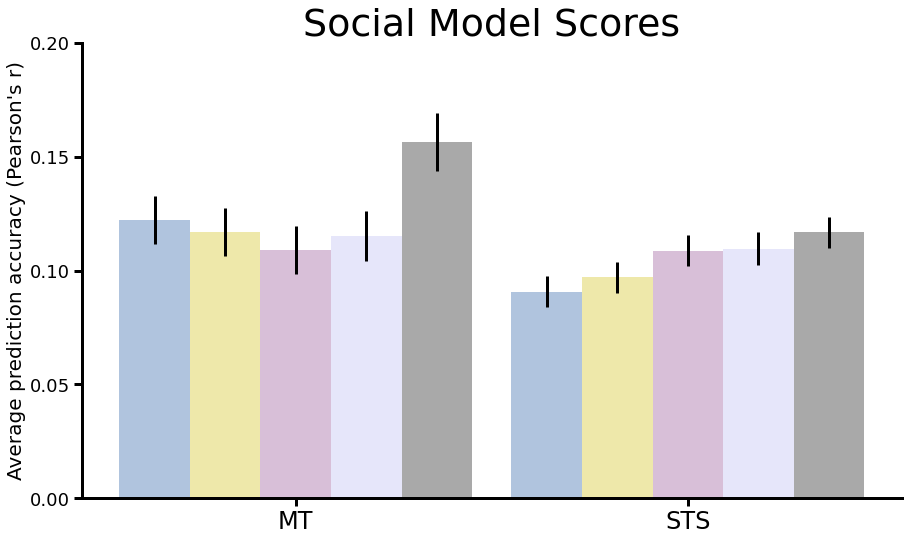

In [25]:
### Social scores model : mean activation for each subject in MT for energy model


# Calculate the average of the array of individual subj average 
social_MT_34yrs_mean = mt_34yrs_social_score.mean()
social_MT_5yrs_mean = mt_5yrs_social_score.mean()
social_MT_7yrs_mean = mt_7yrs_social_score.mean()
social_MT_812yrs_mean = mt_812yrs_social_score.mean()
social_MT_adults_mean = mt_adult_social_score.mean()

#std
social_MT_34yrs_std = np.std(mt_34yrs_social_score)
social_MT_5yrs_std= np.std(mt_5yrs_social_score)
social_MT_7yrs_std= np.std(mt_7yrs_social_score)
social_MT_812yrs_std= np.std(mt_812yrs_social_score)
social_MT_adults_std = np.std(mt_adult_social_score)

#err
social_MT_34yrs_err = np.std(mt_34yrs_social_score)/np.sqrt(len(mt_34yrs_social_score))
social_MT_5yrs_err= np.std(mt_5yrs_social_score)/np.sqrt(len(mt_5yrs_social_score))
social_MT_7yrs_err= np.std(mt_7yrs_social_score)/np.sqrt(len(mt_7yrs_social_score))
social_MT_812yrs_err= np.std(mt_812yrs_social_score)/np.sqrt(len(mt_812yrs_social_score))
social_MT_adults_err = np.std(mt_adult_social_score)/np.sqrt(len(mt_adult_social_score))

### Social scores model: mean activation for each subject in STS for energy model

# Calculate the average of the array of individual subj average 
social_STS_34yrs_mean = sts_34yrs_social_score.mean()
social_STS_5yrs_mean = sts_5yrs_social_score.mean()
social_STS_7yrs_mean = sts_7yrs_social_score.mean()
social_STS_812yrs_mean = sts_812yrs_social_score.mean()
social_STS_adults_mean = sts_adult_social_score.mean()

#STD
social_STS_34yrs_std = np.std(sts_34yrs_social_score)
social_STS_5yrs_std= np.std(sts_5yrs_social_score)
social_STS_7yrs_std= np.std(sts_7yrs_social_score)
social_STS_812yrs_std= np.std(sts_812yrs_social_score)
social_STS_adults_std = np.std(sts_adult_social_score)

social_STS_34yrs_err = np.std(sts_34yrs_social_score)/np.sqrt(len(sts_34yrs_social_score))
social_STS_5yrs_err= np.std(sts_5yrs_social_score)/np.sqrt(len(sts_5yrs_social_score))
social_STS_7yrs_err= np.std(sts_7yrs_social_score)/np.sqrt(len(sts_7yrs_social_score))
social_STS_812yrs_err= np.std(sts_812yrs_social_score)/np.sqrt(len(sts_812yrs_social_score))
social_STS_adults_err = np.std(sts_adult_social_score)/np.sqrt(len(sts_adult_social_score))

# Define labels, positions, bar heights and error bar heights
labels = ['MT', 'STS']
X_axis = np.arange(len(labels))


social_34 = [social_MT_34yrs_mean, social_STS_34yrs_mean]
error = [social_MT_34yrs_err,social_STS_34yrs_err]

social_5 = [social_MT_5yrs_mean, social_STS_5yrs_mean]
error2 = [social_MT_5yrs_err,social_STS_5yrs_err ]

social_7 = [social_MT_7yrs_mean, social_STS_7yrs_mean]
error3 = [social_MT_5yrs_err,social_STS_5yrs_err ]

social_812 = [social_MT_812yrs_mean, social_STS_812yrs_mean]
error4 = [social_MT_812yrs_err,social_STS_812yrs_err ]

social_adult = [social_MT_adults_mean, social_STS_adults_mean]
error5 = [social_MT_adults_err, social_STS_adults_err]

_, ax = plt.subplots(figsize=(14.69, 8.38))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(width=3, length=8)
ax.bar(X_axis - 0.36, social_34, 0.18, yerr=error, label = '3-4 yrs', color = 'lightsteelblue', error_kw=dict(lw=3))
ax.bar(X_axis - 0.18, social_5, 0.18, yerr= error2, label = '5 yrs', color ='palegoldenrod', error_kw=dict(lw=3))
ax.bar(X_axis + 0.0, social_7, 0.18, yerr= error3, label = '7 yrs', color ='thistle', error_kw=dict(lw=3))
ax.bar(X_axis + 0.18, social_812, 0.18, yerr= error4, label = '8-12 yrs', color ='lavender', error_kw=dict(lw=3))
ax.bar(X_axis + 0.36, social_adult, 0.18, yerr= error5, label = 'adults', color ='darkgrey', error_kw=dict(lw=3))


# Scatter individual scores
# scatter_width = 0.18
# scatter_shifts = [-0.36, -0.18, 0.0, 0.18, 0.36]
# scores_MT = [mt_34yrs_social_score, mt_5yrs_social_score, mt_7yrs_social_score, mt_812yrs_social_score, mt_adult_social_score]
# scores_STS = [sts_34yrs_social_score, sts_5yrs_social_score, sts_7yrs_social_score, sts_812yrs_social_score, sts_adult_social_score]

# age_colors = ['lightsteelblue', 'palegoldenrod', 'thistle', 'lavender', 'darkgrey']
# darkened_colors = [darken_color(color) for color in age_colors]


# for i, shift in enumerate(scatter_shifts):
#     # Scatter for MT
#     ax.scatter([X_axis[0] + shift]*len(scores_MT[i]), 
#                scores_MT[i], 
#                marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder

#     # Scatter for STS
#     ax.scatter([X_axis[1] + shift]* len(scores_STS[i]), 
#                scores_STS[i], 
#                marker='o', color=darkened_colors[i], s=40, alpha=0.5, zorder=3) # <-- Added zorder


# Graph general setting

ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=24)
ax.tick_params(axis='y', which='major', labelsize=18)
ax.set_ylabel("Average prediction accuracy (Pearson's r)", fontsize=20)
ax.set_title("Social Model Scores", fontsize=38)
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
#ax.set_ylim([0, 0.2])
ax.legend([], [], frameon=False)
plt.savefig('social_model_no_scatterplt.pdf')
plt.show()

<h1> Two-way Anova